# 📖 TABLE OF CONTENTS

- [1. Introduction]()
- [2. Kaggle Customer Credit Card Dataset]()
  - [Explore the dataset]()
  - [Check for any missing values]()
  - [Check for any duplicated rows]()
  - [Check for imbalances in the dataset]()
  - [Remove unnecessary features]()
  - [Exploratory Data Analysis]()
  - [Categorical columns to One-hot encoding]()
  - [Scaling of values]()
- [3. Model Building using TensorFlow and Keras]()
- [4. Model Training]()
- [5. Model Prediction]()

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 1. Introduction

In today's competitive business landscape, retaining existing customers is just as critical as acquiring new ones. Customer churn, which refers to the loss of customers over time, poses a significant challenge for many industries. Predicting which customers are likely to churn enables businesses to proactively address potential losses, improve customer retention strategies, and ultimately boost profitability.

This project focuses on building a predictive model to classify customers into two categories: those who are likely to churn and those who will stay. Using the [Kaggle Customer Credit Card Dataset](https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction), we will develop an **Artificial Neural Network (ANN)** to accurately predict churn, helping businesses make informed decisions.

**Key Objectives:**

- **Dataset:** The dataset contains customer-related information, including credit card usage behavior, which we will leverage to determine churn likelihood.

- **Model:** We will implement a deep learning model using ANN, optimized for binary classification.

- **Goal:** To predict whether a customer will churn (binary output: 0 for "stay" and 1 for "churn").

**Note**

Before delving deep into the Backpropagation algorithm, we will do some hands-on to better understand how to create a neural network, train it and get predictions. Once you see this in action, Backpropagation algorithm will become easy to digest. We will be building 3 projects using TensorFlow and Keras:
- Customer Churn Prediction using ANN => Binary Classification Problem
- Handwritten Digit Classification using ANN => Multi-class Classification Problem
- Graduate Admission Prediction using ANN => Regression Problem

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 2. Kaggle Customer Credit Card Dataset

The [Kaggle Customer Credit Card Dataset](https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction) contains data of both active customers of a bank and those who exited from the bank.

## Explore the dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("data/datasets/DL_05_Customer_Churn_Prediction_using_ANN-Churn_Modelling.csv")

In [ ]:
print(f"Shape of dataset: {df.shape}")
df.head()

Shape of dataset: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


After exploring the dataset, we can derive the below assumptions:
- Features `RowNumber, CustomerId, Surname` do not seem to contribute much to the target variable `Exited`.
- `Tenure` seems to be the no of years the customer is/was with the bank
- `Balance` seems to be the account balance
- `NumOfProducts` seems to be the no of products used by the customer (for example, Debit Card, Credit Card, Fixed Deposit Account, Recurring Deposit Account etc.)
- `HasCrCard` $\implies$ whether customer has Credit Card or not
- `IsActiveMember` $\implies$ whether customer is an active member of the bank (may be based on the transaction history)
- `EstimatedSalary` $\implies$ Salary of the customer as estimated by the bank (may be using some other ML model)
- `Exited` $\implies$ target variable denoting whether customer has exited the bank or not

## Check for any missing values

In [ ]:
# Check the dataset for any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are no missing values. Features `Surname, Geography, Gender` are of type "object" and all other datatypes are properly suited for their corresponding data.

## Check for any duplicated rows

In [ ]:
# Check for any duplicated rows
df.duplicated().sum()

0

As you can see, there are no duplicated rows.

## Check for imbalances in the dataset

In [ ]:
# Check how many customers exited the bank
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

7963 customers are still with the bank while 2037 customers already exited the bank. Hence, the dataset has some imbalance which needs to be taken cared for a really good ML model.

**Note**

Here, we do not correct the dataset imbalance issue since we are not concerned about creating a very accurate model. We are more focused on learning the flow of ML model creation, training and prediction.

In [ ]:
# Get categories in "Geography" column
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In `Geography` column, we can see some imbalance.

In [ ]:
# Check "Gender" column
df["Gender"].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In `Gender` column also, we can see a small imbalance.

## Remove unnecessary features

Before proceeding further, we can remove the first 3 columns `RowNumber, CustomerId, Surname` that do not seem to contribute much to the target variable `Exited`.

In [ ]:
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

Our next approach should be EDA (Exploratory Data Analysis) to find out which features are really useful out of the above features. But we are moving forward without doing EDA since we are more focused on learning the flow of ML model creation, training and prediction.

## Categorical columns to One-hot encoding

We need to convert categorical features `Geography` and `Gender` to one-hot encoding before going further.

In [ ]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


If we have not used `drop_first=True`, we will get 3 columns `Geography_France, Geography_Germany, Geography_Spain` replacing `Geography` column and 2 columns `Gender_Female, Gender_Male` replacing `Gender` column. Since we have used `drop_first=True`, `Geography_France` and `Gender_Female` will be dropped. This is done to avoid Multicollinearity and Redundancy and to make encoding more efficient.

**Note**

1. Avoiding Multicollinearity:

  Multicollinearity occurs when two or more independent variables in an ML model are highly correlated. This can cause issues such as unstable coefficient estimates and reduced interpretability of the model.

2. Redundancy:
  
  When you encode a categorical variable with $n$ categories, you typically create $n$ binary columns. However, you only need $n-1$ binary columns to represent all the categories. The information contained in the $n^{th}$ column can be derived from the values of the first $n-1$ columns. Dropping the first category effectively removes redundant information from the dataset.

## Scaling of values

We can see that some values are really large (six digit numbers in `Balance` and `EstimatedSalary`) while we have single digit numbers in most of the other columns. If we train a neural network without scaling these values, weights may not converge that fast. Hence, it is always recommended to scale the values when working with neural networks.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Exited"])
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (8000, 11)
Shape of y_train: (8000,)
Shape of X_test: (2000, 11)
Shape of y_test: (2000,)


In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,False,False,True
1561,632,42,4,119624.60,2,1,1,195978.86,True,False,True
1670,559,24,3,114739.92,1,1,0,85891.02,False,True,True
6087,561,27,9,135637.00,1,1,0,153080.40,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,False,False,True
5191,682,58,1,0.00,1,1,1,706.50,False,False,False
5390,735,38,1,0.00,3,0,0,92220.12,False,False,False
860,667,43,8,190227.46,1,1,0,97508.04,False,False,True


In [ ]:
y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 8000, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [ ]:
X_test_scaled

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [ ]:
print(f"Single row of X_train_scaled: {X_train_scaled[0]}")
print(f"Single row of X_test_scaled: {X_test_scaled[0]}")

Single row of X_train_scaled: [ 0.35649971 -0.6557859   0.34567966 -1.21847056  0.80843615  0.64920267
  0.97481699  1.36766974 -0.57946723 -0.57638802  0.91324755]
Single row of X_test_scaled: [-0.57749609 -0.6557859  -0.69539349  0.32993735  0.80843615 -1.54035103
 -1.02583358 -1.01960511  1.72572313 -0.57638802  0.91324755]


As you can see, `StandardScaler` has scaled all values to be in the same range. Now, we are ready for Model Building.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 3. Model Building using TensorFlow and Keras

Using Keras, we can build both sequential and non-sequential models. Right now, we are building a sequential model with an input layer of 11 features, 1 hidden layer of 3 nodes (i.e. 3 perceptrons) and an output layer of 1 node.

The neural network architecture is given below:

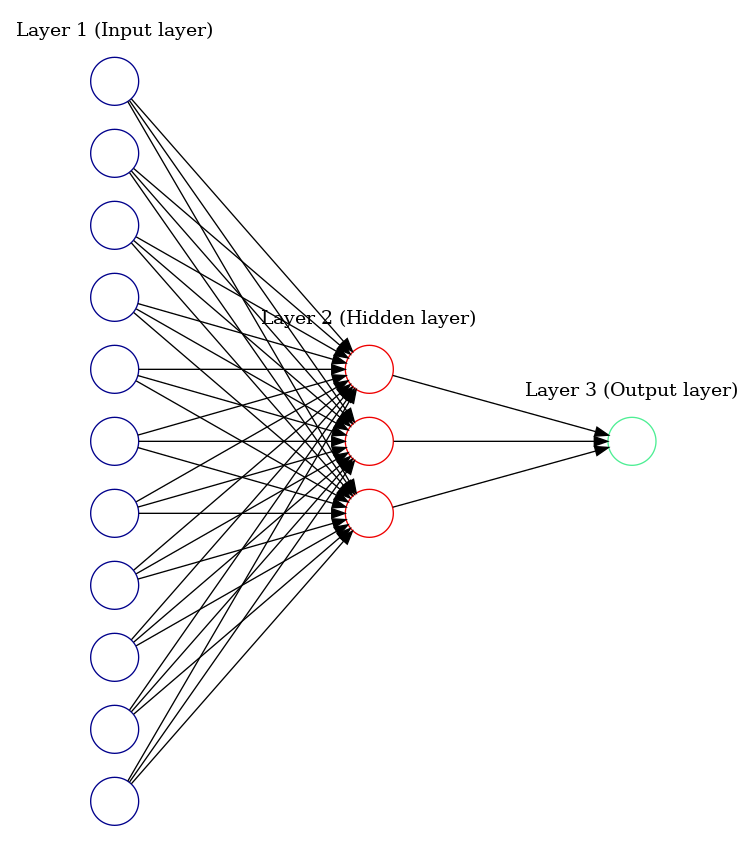

In [ ]:
# Neural Network Architecture

from IPython import display
display.Image("data/images/DL_05_Customer_Churn_Prediction_using_ANN-01-Neural-Network-Architecture.png")

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Create Sequential model object
model = Sequential()

# Add layers (input layer of 11 features, 1 hidden layer of 3 nodes i.e. perceptrons, output layer of 1 node)
model.add(Dense(3, activation="sigmoid", input_dim=11))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
# Get summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


As you can see,
- No of trainable parameters = $(11 \times 3 + 3) + (3 \times 1 + 1) = 36 + 4 = 40$.
- Size of the model = No of trainable parameters $\times$ Size of the datatype = 40 $\times$ 4 bytes = 160 bytes

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 4. Model Training

Now we need to compile our model. In Keras, `model.compile()` is a method used to configure the learning process before training the model. It allows you to specify important parameters such as the optimizer, loss function, and metrics to be used during training.

Since ours is a Binary Classification problem, we can use Binary Cross-entropy loss (or Logistic loss or Log loss). As optimizer, we can use Adam optimizer which performs well in general.

**Note**

The optimizer is the algorithm used to update the weights of the neural network during training.

In [ ]:
# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam")

In [ ]:
# Train the model for 10 epochs
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.8416
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.6327
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5333
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4876
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4664
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4557
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4493
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4447
Epoch 9/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4410
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4380


As you can see, the loss reduced from 0.8416 at the end of $1^{st}$ epoch to 0.4380 at the end of $10^{th}$ epoch.

In [ ]:
# Get weights of 1st layer (i.e. first hidden layer after input layer)
model.layers[0].get_weights()

[array([[ 0.12149855, -0.12095291,  0.04585097],
        [-1.2895452 ,  0.6372283 ,  1.43189   ],
        [-0.07912275, -0.27740595, -0.2236676 ],
        [-0.15410168,  0.4870614 , -0.10649212],
        [ 0.3761278 ,  0.29420137, -0.34484765],
        [-0.10749395,  0.26845407, -0.2840506 ],
        [ 0.8843714 , -0.5949933 , -0.35207662],
        [ 0.00773622, -0.15331681,  0.18457843],
        [-0.72549635,  0.3851958 ,  0.3719037 ],
        [-0.13348784, -0.22751214, -0.15024582],
        [ 0.33587494, -0.7920256 , -0.2917001 ]], dtype=float32),
 array([ 1.0287677 , -0.5923295 , -0.61565953], dtype=float32)]

We can see the 33 weights and 3 biases of $1^{st}$ layer above.

In [ ]:
# Get weights of 2nd layer (i.e. output layer)
model.layers[1].get_weights()

[array([[-1.5641599 ],
        [ 0.42046887],
        [ 0.6675203 ]], dtype=float32),
 array([-0.8258972], dtype=float32)]

We can see the 3 weights and 1 bias of $2^{nd}$ layer above.

Now the model is ready for predictions.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 5. Model Prediction

In [ ]:
y_log = model.predict(X_test_scaled)
print(f"Shape of y_log: {y_log.shape} ")
print(f"y_log: \n{y_log}")

63/63 [==============================] - 0s 1ms/step
Shape of y_log: (2000, 1) 
y_log: 
[[0.20540382]
 [0.11942828]
 [0.28892466]
 ...
 [0.3720702 ]
 [0.11419892]
 [0.20576361]]


Here, we do not get $0$ or $1$ as output from the model. This is because we are using `sigmoid` activation in the output layer with 1 perceptron. Hence, it will give a single probability value in the range $(0, 1)$.

Now, we need to convert these probabilities for each customer $P_i$ to $0$ or $1$. For this, first we need to take a threshold probability value $P_{th}$. Then, we have:

$
P_i = \begin{cases}
0, & \text{if } P_i < P_{th} \\
1, & \text{if } P_i \geq P_{th}
\end{cases}
$

Here, we take a probability threshold of $P_{th} = 0.5$.

**Note**

To precisely calculate the probability threshold, we need to examine the ROC (Receiver Operating Characteristic) and AUC (Area Under ROC) curves.

In [ ]:
# Convert probabilities to 1 or 0
y_pred = np.where(y_log > 0.5, 1, 0)
print(f"Shape of y_pred: {y_pred.shape}")
print(f"y_pred: \n{y_pred}")

Shape of y_pred: (2000, 1)
y_pred: 
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


Now we can check the accuracy of our model.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8135


We can improve the accuracy of our model in multiple ways:
- Increase the number of epochs for training
- Change activation of hidden layers from `sigmoid` to `relu`
- Increase the number of nodes in hidden layers
- Increase the number of hidden layers

**Note**

We have to experiment with any combination of above methods to optimize our model so that it is better suited for our tasks. If we do not add enough nodes or layers, it will lead to Underfitting. If we add hidden layers more than necessary, it will lead to Overfitting. Hence, we need to strike a balance while optimizing our model using above methods.